In [1]:
import pandas as pd
import numpy as np
import os,sys
import ROOT as rt

Welcome to JupyROOT 6.26/02


In [41]:
save_ = True

In [2]:
data = pd.read_csv('Fig4_Simulated_NeutronDistributions.txt', delimiter='\t',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,X_SbBe,Y_SbBeER,Y_SbBeNRsingle,Y_SbBeNRmultiple,Y_SbBeAll,X_YBe,Y_YBeER,Y_YBeNRsingle,Y_YBeNRmultiple,Y_YBeAll
1,0.025,208735,37515,31358,398421,0.05,300899,47499,41369,551527
2,0.075,10,5950,2959,10216,0.15,23,5542,2845,10870
3,0.125,13,4578,1898,7610,0.25,20,4196,1797,7801
4,0.175,6,3965,1558,6594,0.35,21,3614,1522,6557


In [3]:
data.columns = [i for i in data.iloc[0]]
title = [i for i in data.iloc[0]]
data = data.drop([0])
data.head()

,X_SbBe,Y_SbBeER,Y_SbBeNRsingle,Y_SbBeNRmultiple,Y_SbBeAll,X_YBe,Y_YBeER,Y_YBeNRsingle,Y_YBeNRmultiple,Y_YBeAll
1,0.025,208735,37515,31358,398421,0.05,300899,47499,41369,551527
2,0.075,10,5950,2959,10216,0.15,23,5542,2845,10870
3,0.125,13,4578,1898,7610,0.25,20,4196,1797,7801
4,0.175,6,3965,1558,6594,0.35,21,3614,1522,6557
5,0.225,12,3892,1525,6311,0.45,21,3025,1332,5476


In [27]:
sources = ['SbBe','YBe']
interactions = ['ER','NRmultiple','NRsingle','All']
legend_text = {
    interactions[0] : 'Neutron induced ER',
    interactions[1] : 'Mutiple scatter NR',
    interactions[2] : 'Single scatter NR',
    interactions[3] : 'All'
}
hist_att = {
    sources[0] : [100, 0, 5], #0.05 keV bin width for Sb
    sources[1] : [150, 0, 15] #0.01 keV bin width for Y
}

In [28]:
hists_Sb = []
hists_Y = []

for source in sources:
    non_null = data['X_%s'%(source)].notna()
    bincenter = pd.to_numeric(data['X_%s'%(source)][non_null], errors='coerce')
    
    #print (bincenter)
    for interaction in interactions:
        col = source+interaction
        bincontent = pd.to_numeric(data['Y_%s'%(col)][non_null], errors='coerce')
        if(len(bincenter) != len(bincontent)):
            print('lengths not equal for %s'%(col))
            sys.exit()
        
        print ('Filling info for %s ...'%(col))
        xbins = (hist_att[source])[0]
        xmin = (hist_att[source])[1]
        xmax = (hist_att[source])[2]
        temp_hist = rt.TH1F(interaction,interaction,int(xbins),xmin,xmax)
        temp_hist.SetName(interaction)
        bin_ = 1
        while(bin_ <= temp_hist.GetNbinsX()):
            temp_hist.SetBinContent(bin_,bincontent.iloc[bin_-1])
            bin_ += 1
        if(source == 'SbBe'):
            hists_Sb.append(temp_hist)
        else:
            hists_Y.append(temp_hist)
        del temp_hist

        
print('Done!!')

for hist in hists_Sb:
    print(hist.GetName())
        

Filling info for SbBeER ...
Filling info for SbBeNRmultiple ...
Filling info for SbBeNRsingle ...
Filling info for SbBeAll ...
Filling info for YBeER ...
Filling info for YBeNRmultiple ...
Filling info for YBeNRsingle ...
Filling info for YBeAll ...
Done!!
ER
NRmultiple
NRsingle
All


Warning in <TROOT::Append>: Replacing existing TH1: ER (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: NRmultiple (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: NRsingle (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: All (Potential memory leak).


In [30]:
line_color = [rt.kBlue, rt.kGreen, rt.kRed, rt.kBlack]

ER
NRmultiple
NRsingle
All
Plots saved!!


Info in <TCanvas::Print>: png file ./plots/png/Fig_4a.png has been created
Info in <TCanvas::Print>: pdf file ./plots/pdf/Fig_4a.pdf has been created


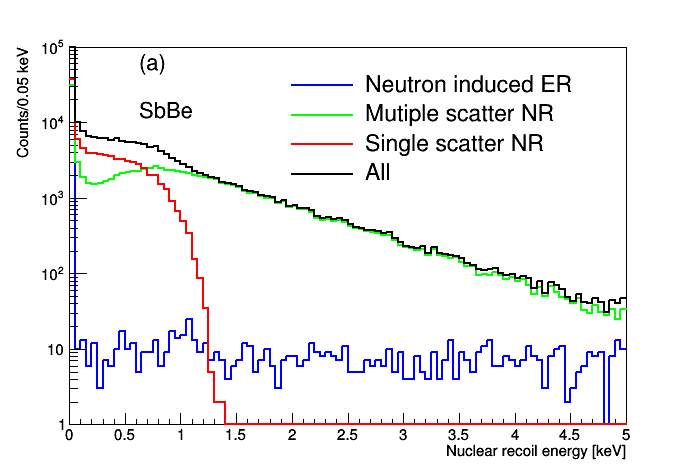

In [42]:
c = rt.TCanvas()
rt.gStyle.SetOptStat(0)
count = 0
legend = rt.TLegend(0.4,0.85,0.9,0.6)
legend.SetBorderSize(0)

for i,hist in enumerate(hists_Sb):
    hist.SetLineColor(line_color[i])
    hist.SetLineWidth(2)
    hist.GetXaxis().SetTitle('Nuclear recoil energy [keV]')
    hist.GetYaxis().SetTitle('Counts/%0.2f keV'%(hist_att['SbBe'][2]/hist_att['SbBe'][0]))
    hist.GetYaxis().SetRangeUser(1,1.e5)
    hist.SetTitle('')
    if(count == 0):
        hist.Draw()
        count += 1
    else:
        hist.Draw('SAME')
    legend.AddEntry(hist,legend_text[hist.GetName()],'l')
    print(hist.GetName())

legend.Draw()
c.Draw()
rt.gPad.SetLogy()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.05);
textOnTop.DrawLatexNDC(0.2,0.85,"#bf{(a)}");


textOnTop.DrawLatexNDC(0.2,0.75,"#bf{SbBe}");

if(save_):
    c.SaveAs('./plots/png/Fig_4a.png')
    c.SaveAs('./plots/pdf/Fig_4a.pdf')
    print ('Plots saved!!')

ER
NRmultiple
NRsingle
All
Plots saved!!


Info in <TCanvas::Print>: png file ./plots/png/Fig_4b.png has been created
Info in <TCanvas::Print>: pdf file ./plots/pdf/Fig_4b.pdf has been created


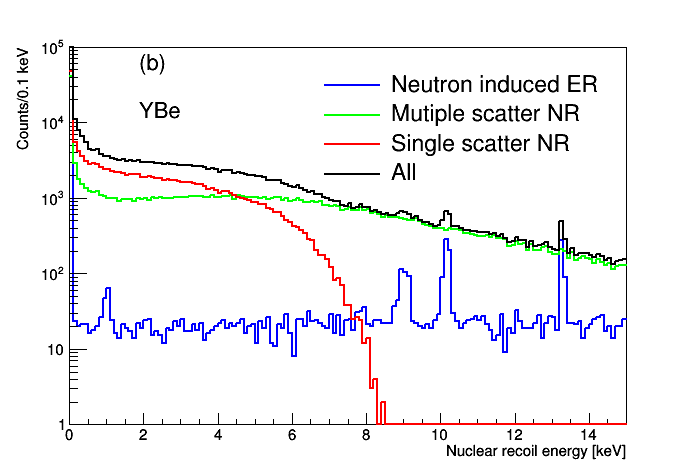

In [44]:
c = rt.TCanvas()
rt.gStyle.SetOptStat(0)
count = 0
legend = rt.TLegend(0.45,0.85,0.9,0.6)
legend.SetBorderSize(0)

for i,hist in enumerate(hists_Y):
    hist.SetLineColor(line_color[i])
    hist.SetLineWidth(2)
    hist.GetXaxis().SetTitle('Nuclear recoil energy [keV]')
    hist.GetYaxis().SetTitle('Counts/%0.1f keV'%(hist_att['YBe'][2]/hist_att['YBe'][0]))
    hist.GetYaxis().SetRangeUser(1,1.e5)
    hist.SetTitle('')
    if(count == 0):
        hist.Draw()
        count += 1
    else:
        hist.Draw('SAME')
    legend.AddEntry(hist,legend_text[hist.GetName()],'l')
    print(hist.GetName())

legend.Draw()
c.Draw()
rt.gPad.SetLogy()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.05);
textOnTop.DrawLatexNDC(0.2,0.85,"#bf{(b)}");


textOnTop.DrawLatexNDC(0.2,0.75,"#bf{YBe}");

if(save_):
    c.SaveAs('./plots/png/Fig_4b.png')
    c.SaveAs('./plots/pdf/Fig_4b.pdf')
    print ('Plots saved!!')